## Subplots and Combining Visualizations

o Learn about subplot notation in matplotlib

o Put multiple visualizations on the same axes objects

o Show errors

o Adjust figure layout

o Add images to plots

#### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

##### Sample data

In [ ]:
# Create sample data
np.random.seed(613)
x1 = np.arange(50)
y1 = np.random.randint(0, 75,50)
x2 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y2 = np.array([110, 180, 240, 99, 220])

##### Subplot

C:\Users\hgior\AppData\Local\Temp\ipykernel_12252\439659632.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


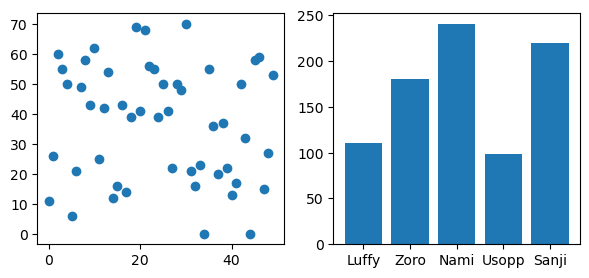

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols=2,
                                nrows=1,
                                figsize=(7, 3))

ax1.scatter(x1,y1)      # Scatter plot
ax2.bar(x2,y2)          # Bar plot
fig.show()

##### Subplots without a grid arrangement (plt.subplot_mosaic)

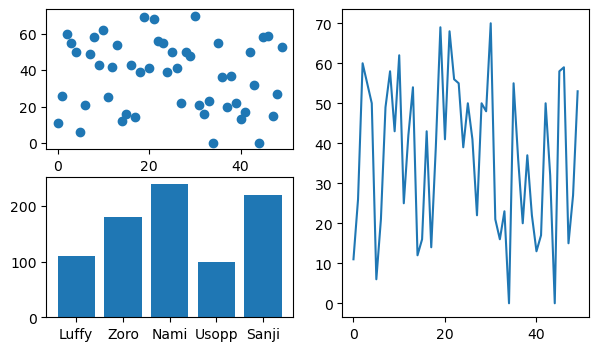

In [9]:
fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3'],
                                    ['ax2', 'ax3',]],
                                    figsize=(7, 4))

someaxes["ax1"].scatter(x1,y1)
someaxes["ax2"].bar(x2,y2)
someaxes["ax3"].plot(x1,y1)
plt.show()

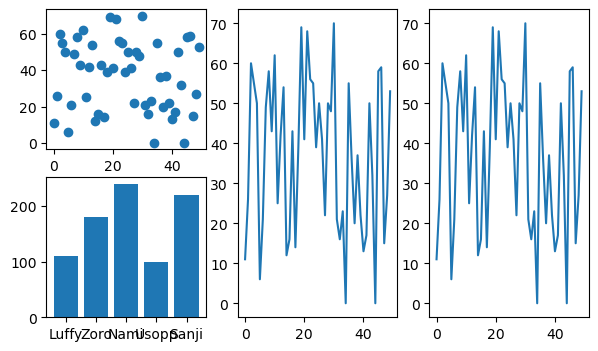

In [8]:
fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3', 'ax4'],
                                    ['ax2', 'ax3', 'ax4']],
                                    figsize=(7, 4))

someaxes["ax1"].scatter(x1,y1)
someaxes["ax2"].bar(x2,y2)
someaxes["ax3"].plot(x1,y1)
someaxes["ax4"].plot(x1,y1)
plt.show()

### Modify Figure Layout

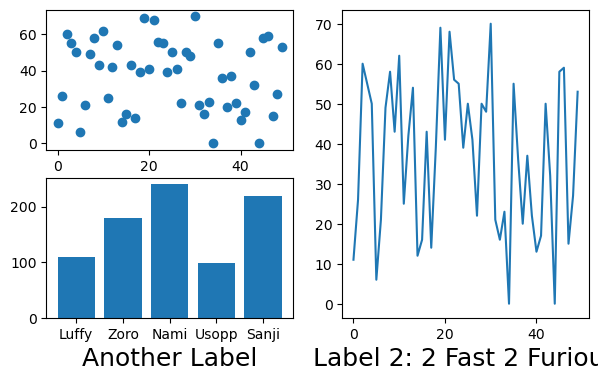

In [10]:
fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3'],
['ax2', 'ax3']],
figsize=(7, 4))
someaxes["ax1"].scatter(x1,y1)
someaxes["ax2"].bar(x2,y2)
someaxes["ax3"].plot(x1,y1)
someaxes["ax1"].set_xlabel('A Big Label',fontsize=18)
someaxes["ax2"].set_xlabel('Another Label',fontsize=18)
someaxes["ax3"].set_xlabel('Label 2: 2 Fast 2 Furious',fontsize=18 )
plt.show()

Layouts

•	We can use layouts to make sure that our subplots fit neatly in our figure area

•	There are two main kinds of layout we consider:

  +	*Tight layout* adjusts subplots so tick labels, axis labels, and titles don't overlap or leave the figure area

  +	*Constrained layout* works similarly except it also fits things like legends or colorbars


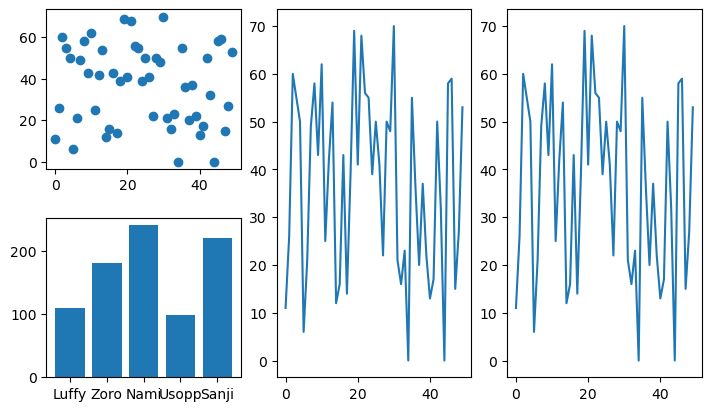

In [11]:
fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3', 'ax4'],
                                    ['ax2', 'ax3', 'ax4']],
                                    figsize=(7, 4), 
                                    layout = 'constrained')

someaxes["ax1"].scatter(x1,y1)
someaxes["ax2"].bar(x2,y2)
someaxes["ax3"].plot(x1,y1)
someaxes["ax4"].plot(x1,y1)
plt.show()

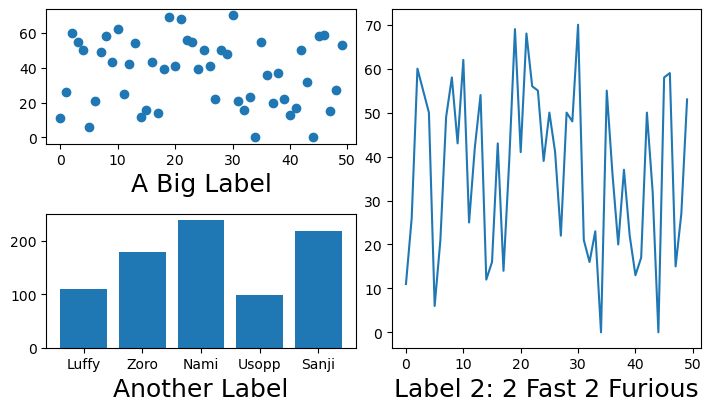

In [12]:
fig, someaxes = plt.subplot_mosaic([['ax1', 'ax3'],
                                    ['ax2', 'ax3']],
                                    figsize=(7, 4), 
                                    layout = 'constrained')

someaxes["ax1"].scatter(x1,y1)
someaxes["ax2"].bar(x2,y2)
someaxes["ax3"].plot(x1,y1)
someaxes["ax1"].set_xlabel('A Big Label',fontsize=18)
someaxes["ax2"].set_xlabel('Another Label',fontsize=18)
someaxes["ax3"].set_xlabel('Label 2: 2 Fast 2 Furious',fontsize=18 )
plt.show()

## Multiple Viz on One Axes 

*(Starting session 26-11-24)*

##### Librarries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL

##### Sample data

In [18]:
# first make our sample data
x = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])
y2 = np.array([170, 100, 90, 120, 50])

##### Subplot

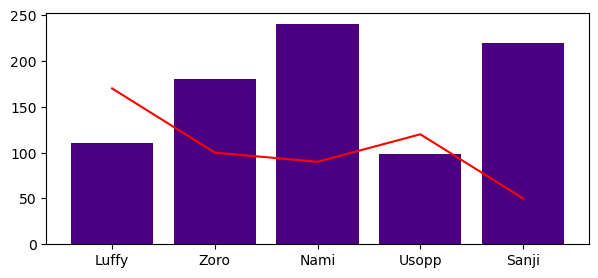

In [19]:
# define our figure and axes (just one this time)
fig, ax = plt.subplots(figsize=(7, 3))
# now call both bar and plot elements to the same axes (ax)
ax.bar(x, y1,
color = "indigo")
ax.plot(x, y2,
color = "red")

##### Add Error Information

<ErrorbarContainer object of 3 artists>

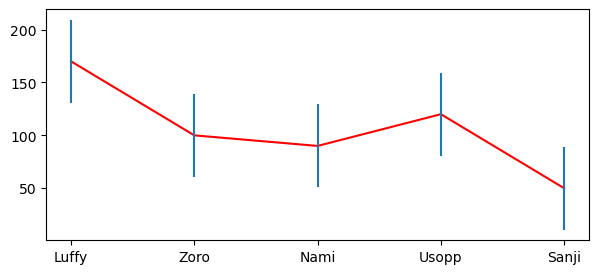

In [20]:
# Calculate standard deviation
y2_sd = np.std(y2) 

# Line plot - standard deviation
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2, color = "red")

# Create error bar
ax.errorbar(x, #our x values
            y2, #our y values
            yerr = y2_sd,
            fmt = "none")

##### Customizing Error-bar Appearance

<ErrorbarContainer object of 3 artists>

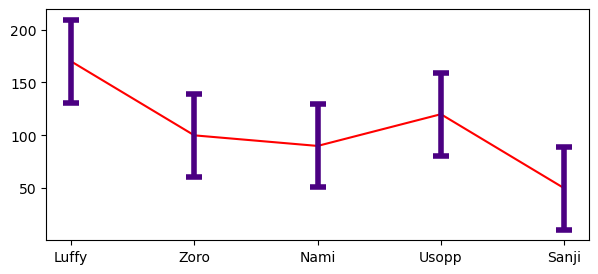

In [21]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2,
        color = "red")

ax.errorbar(x,
            y2,
            yerr = y2_sd,
            fmt = "none",
            ecolor= "indigo",
            elinewidth= 4,
            capsize = 6,
            capthick = 4)

##### Intervals of Error-bar (Errorevery)

<ErrorbarContainer object of 3 artists>

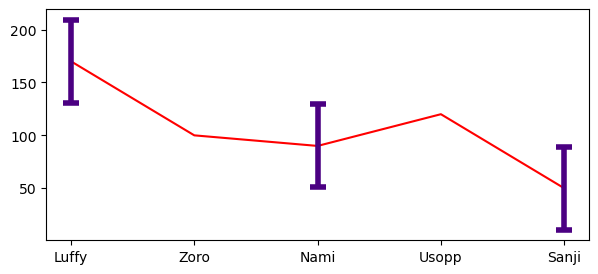

In [22]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2,
        color = "red")

ax.errorbar(x,
            y2,
            yerr = y2_sd,
            fmt = "none",
            ecolor = "indigo",
            elinewidth = 4,
            capsize = 6,
            capthick = 4,
            errorevery = 2)  # Error-bar interval every 2 point

##### Add Images to Plots

##### Libraries

In [23]:
from PIL import Image       # to open images
import requests             # to get images from URLs
from io import BytesIO      # to store images

##### Add picture

In [ ]:
response = requests.get('https://upload.wikimedia.org/wikipedia/en/c/cb/Monkey_D_Luffy.png')
image_file = BytesIO(response.content)
image = Image.open(image_file)

#### Plot

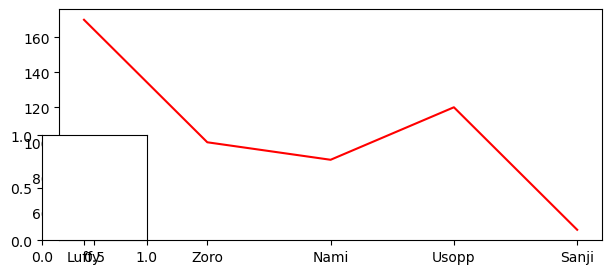

In [ ]:
# Define a line plot (reusing data)
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2, color = "red")

# Container for image (ax_image)
ax_image = fig.add_axes([0.1, # x coordinate (ON FIGURE, NOT AXES)
                        0.11, # y coordinate (ON FIGURE, NOT AXES)
                        0.15, # image width
                        0.35]) # image height

##### Add picture prepared before (imshow)

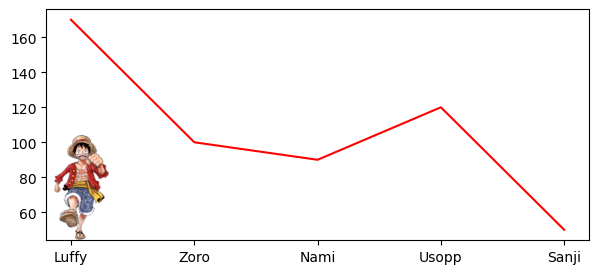

In [25]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2,
        color = "red")

ax_image = fig.add_axes([0.1, 0.11, 0.15, 0.35])

ax_image.imshow(image)   # Adding the picture
ax_image.axis('off')
plt.show()